# Scrape and Analyze Mars Weather Data

In [7]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [9]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [10]:
# Create a Beautiful Soup Object
soup_object= soup(browser.html, 'html.parser')

# Find the table
mars_table = soup_object.find('table')

In [11]:
# Extract all rows of data
mars_weather_data = mars_table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [38]:
# Create an empty list for the rows of data

mars_weather_rows = []

# Find all rows within the table (excluding the header row)
data_rows = mars_table.find_all('tr')[1:] 

for row in data_rows:
    # Find all cells within the row
    cells = row.find_all('td')
    
    # Extract the text from each cell and store it in a list for this row
    row_data = [cell.get_text() for cell in cells]
    
    # Append the row data to the mars_weather_rows list
    mars_weather_rows.append(row_data)



# Find all header cells within the table
header_cells = mars_table.find_all('th')

# Create an empty list to store the column names
column_names = []

# Loop through the header cells and extract the text
for cell in header_cells:
    column_names.append(cell.get_text())
# # Create an empty list for the column headers
# mars_weather_headers = []

# for header in mars_weather_rows[0].split('\n'):
    
#     # Extract the text from each column header
#     mars_weather_headers.append(header)   

In [35]:
column_names

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [39]:
mars_weather_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [45]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(mars_weather_rows, columns=column_names)

In [46]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [51]:
# Examine data type of each column
data_types = mars_weather_df.dtypes 
data_types

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [59]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = mars_weather_df['sol'].astype('datetime64[ns]')
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int) 
mars_weather_df['month'] = mars_weather_df['month'].astype(int) 
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype('float64') 
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype('float64')

In [58]:
# Confirm type changes were successful by examining data types again
changed_data_types = mars_weather_df.dtypes
changed_data_types

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [68]:
# 1. How many months are there on Mars?
months_on_mars = mars_weather_df.groupby('month').size()
months_on_mars

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
print(len(mars_weather_df))

1867

In [74]:
# 3. What is the average low temperature by month?
ave_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean() 
ave_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean() 
ave_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

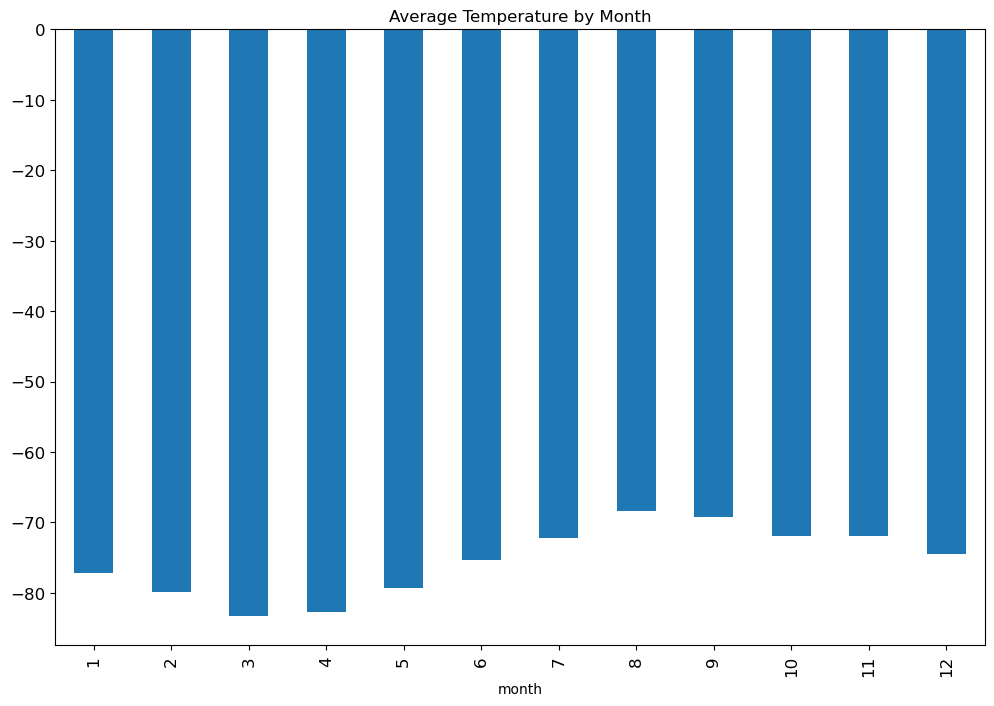

In [89]:
# Plot the average temperature by month
temp_bar_graph = ave_temp_by_month.plot(kind='bar', title ="Average Temperature by Month", 
                        figsize=(12, 8), fontsize=12)  

In [87]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = ave_temp_by_month.idxmin()
hottest_month = ave_temp_by_month.idxmax()
print(f'The coldest month is {coldest_month} and the hottest month is {hottest_month}.')

The coldest month is 3 and the hottest month is 8.


In [90]:
# Average pressure by Martian month
ave_pressr_by_month = mars_weather_df.groupby('month')['pressure'].mean()    
ave_pressr_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

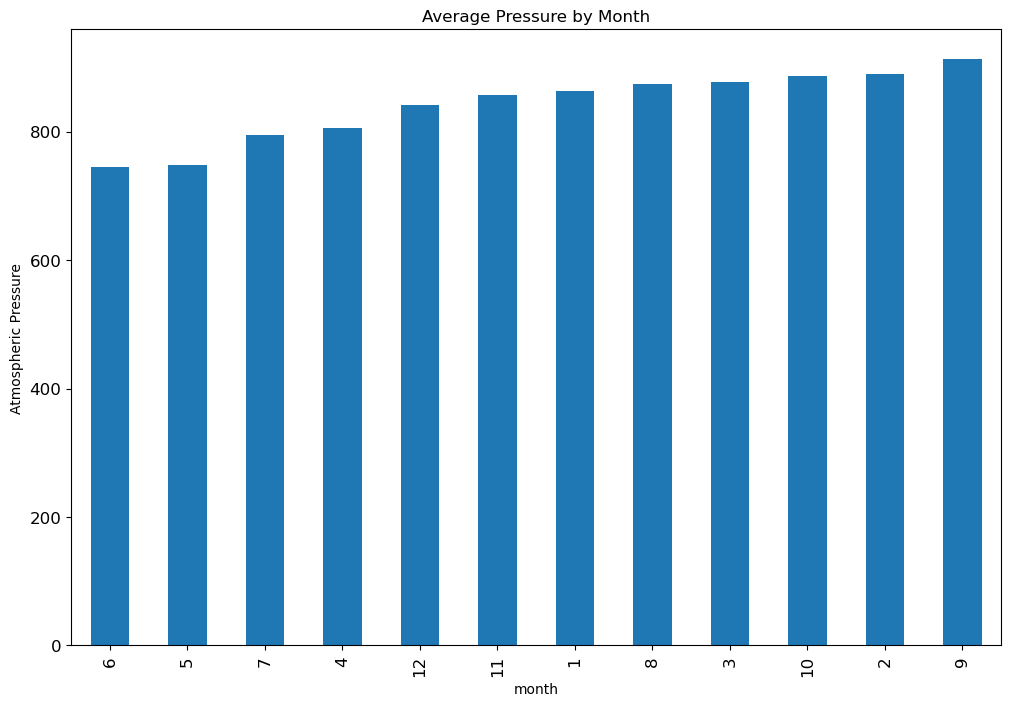

In [99]:
# Plot the average pressure by month
ave_pressr_by_month.sort_values(ascending=True, inplace=True)
ave_pressr_graph = ave_pressr_by_month.plot(kind='bar', title = "Average Pressure by Month", 
                        figsize=(12, 8), fontsize=12)
plt.ylabel("Atmospheric Pressure"); # use semi-colon to suppress unwanted matplotlib output

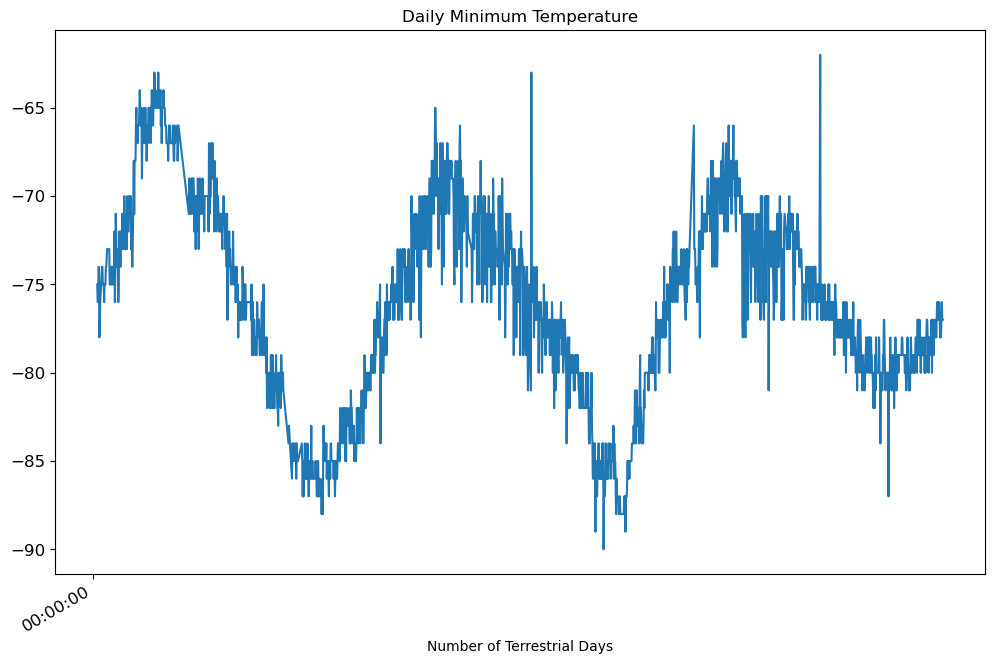

In [142]:
daily_min_temp = mars_weather_df.groupby('terrestrial_date')['min_temp'].min()  


daily_min_temp_graph = daily_min_temp.plot(kind='line', title = "Daily Minimum Temperature", figsize=(12, 8), fontsize=12)
daily_min_temp_graph.set_xlabel("Number of Terrestrial Days"); # Suppress unwanted output

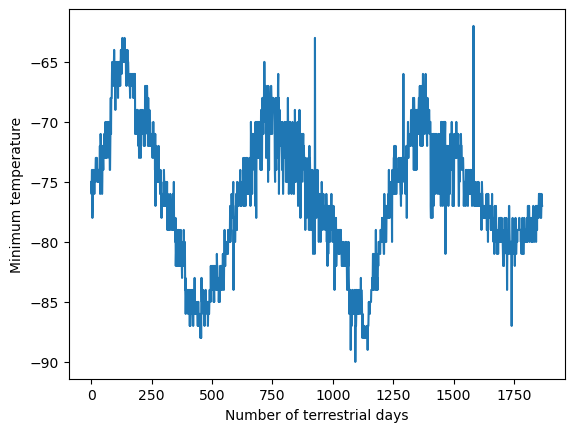

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [143]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather.csv', index=False)

In [21]:
browser.quit()